# 财务因子数据分析


* 李永乐老师  茅台与招商比较

https://www.bilibili.com/video/BV17f4y1v7G1?spm_id_from=333.999.header_right.fav_list.click


trading_derivative_indicator
PB	市净率(PB)	倍	市净率=当日收盘价＊当日公司总股本／净资产，其中净资产取最新报告期披露的净资产。
PELFY	市盈率LFY	倍	市盈率=当日收盘价＊当日公司总股本／净利润，其中净利润取最近年报披露的“归属母公司所有者的净利润”。


income_statement
NETPROFIT	净利润

SHSE.600036 招商银行
SHSE.600519 贵州茅台

### classwork 1

* 参考李永乐老师视频，完成当前茅台与招商股票市盈率，市净率，市盈增长比的计算

In [1]:
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr,spearmanr,kendalltau
import pandas as pd
import numpy as np

from gm.api import *
set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [2]:
cw_g_z=get_fundamentals_n(table='trading_derivative_indicator', symbols=["SHSE.600519","SHSE.600036"], end_date="2022-05-01", count=20,
                            fields='PELFY,PB',df=True)

In [11]:
cw1=cw_g_z.set_index(["end_date","symbol"]).unstack()

In [12]:
cw1

pub_date                            \
symbol                                  SHSE.600036               SHSE.600519   
end_date                                                                        
2022-03-31 00:00:00+08:00 2022-03-31 00:00:00+08:00 2022-03-31 00:00:00+08:00   
2022-04-01 00:00:00+08:00 2022-04-01 00:00:00+08:00 2022-04-01 00:00:00+08:00   
2022-04-06 00:00:00+08:00 2022-04-06 00:00:00+08:00 2022-04-06 00:00:00+08:00   
2022-04-07 00:00:00+08:00 2022-04-07 00:00:00+08:00 2022-04-07 00:00:00+08:00   
2022-04-08 00:00:00+08:00 2022-04-08 00:00:00+08:00 2022-04-08 00:00:00+08:00   
2022-04-11 00:00:00+08:00 2022-04-11 00:00:00+08:00 2022-04-11 00:00:00+08:00   
2022-04-12 00:00:00+08:00 2022-04-12 00:00:00+08:00 2022-04-12 00:00:00+08:00   
2022-04-13 00:00:00+08:00 2022-04-13 00:00:00+08:00 2022-04-13 00:00:00+08:00   
2022-04-14 00:00:00+08:00 2022-04-14 00:00:00+08:00 2022-04-14 00:00:00+08:00   
2022-04-15 00:00:00+08:00 2022-04-15 00:00:00+08:00 2022-04-15 00:00:00+08:00   
2022-04-18 00:00:00+08:00 2022-04-18 00:00:00+08:00 2022-04-18 00:00:00+08:00   
2022-04-19 00:00:00+08:00 2022-04-19 00:00:00+08:00 2022-04-19 00:00:00+08:00   
2022-04-20 00:00:00+08:00 2022-04-20 00:00:00+08:00 2022-04-20 00:00:00+08:00   
2022-04-21 00:00:00+08:00 2022-04-21 00:00:00+08:00 2022-04-21 00:00:00+08:00   
2022-04-22 00:00:00+08:00 2022-04-22 00:00:00+08:00 2022-04-22 00:00:00+08:00   
2022-04-25 00:00:00+08:00 2022-04-25 00:00:00+08:00 2022-04-25 00:00:00+08:00   
2022-04-26 00:00:00+08:00 2022-04-26 00:00:00+08:00 2022-04-26 00:00:00+08:00   
2022-04-27 00:00:00+08:00 2022-04-27 00:00:00+08:00 2022-04-27 00:00:00+08:00   
2022-04-28 00:00:00+08:00 2022-04-28 00:00:00+08:00 2022-04-28 00:00:00+08:00   
2022-04-29 00:00:00+08:00 2022-04-29 00:00:00+08:00 2022-04-29 00:00:00+08:00   

                                PELFY                      PB              
symbol                    SHSE.600036 SHSE.600519 SHSE.600036 SHSE.600519  
end_date                                                                   
2022-03-31 00:00:00+08:00      9.8421     41.1628      1.3744     11.3929  
2022-04-01 00:00:00+08:00      9.9052     42.6237      1.3832     11.7973  
2022-04-06 00:00:00+08:00      9.9662     42.2643      1.3918     11.6978  
2022-04-07 00:00:00+08:00      9.8548     42.2643      1.3762     11.6978  
2022-04-08 00:00:00+08:00      9.9221     42.7192      1.3856     11.8237  
2022-04-11 00:00:00+08:00      9.6529     41.1867      1.3480     11.3995  
2022-04-12 00:00:00+08:00      9.6108     42.6713      1.3421     11.8104  
2022-04-13 00:00:00+08:00      9.6213     42.3600      1.3436     11.7243  
2022-04-14 00:00:00+08:00      9.6234     43.3179      1.3439     11.9894  
2022-04-15 00:00:00+08:00      9.8484     43.2458      1.3753     11.9694  
2022-04-18 00:00:00+08:00      9.1250     42.8825      1.2743     11.8689  
2022-04-19 00:00:00+08:00      8.8537     42.8701      1.2364     11.8655  
2022-04-20 00:00:00+08:00      8.6434     43.0305      1.2070     11.9099  
2022-04-21 00:00:00+08:00      8.6813     42.6230      1.2123     11.7971  
2022-04-22 00:00:00+08:00      8.9378     42.4558      1.2482     11.7508  
2022-04-25 00:00:00+08:00      8.1660     40.8994      1.0960     11.3200  
2022-04-26 00:00:00+08:00      8.0777     41.4855      1.0842     11.4822  
2022-04-27 00:00:00+08:00      7.9999     42.9807      1.0737     10.9041  
2022-04-28 00:00:00+08:00      8.3322     43.9405      1.1183     11.1475  
2022-04-29 00:00:00+08:00      8.3974     43.7819      1.1271     11.1073

In [13]:
41.1628/9.8421

4.182318814074232

In [14]:
11.3929/1.3744

8.289362630966238

In [15]:
lr_g_z=get_fundamentals_n(table='income_statement', symbols=["SHSE.600519","SHSE.600036"], end_date="2022-05-01", count=20,
                            fields='NETPROFIT',df=True)
lr_g_z

,symbol,pub_date,end_date,NETPROFIT
0,SHSE.600519,2022-04-27 00:00:00+08:00,2022-03-31 00:00:00+08:00,1.7952e+10
1,SHSE.600519,2022-03-31 00:00:00+08:00,2021-12-31 00:00:00+08:00,5.5721e+10
2,SHSE.600519,2021-10-23 00:00:00+08:00,2021-09-30 00:00:00+08:00,3.9575e+10
3,SHSE.600519,2021-07-31 00:00:00+08:00,2021-06-30 00:00:00+08:00,2.6207e+10
4,SHSE.600519,2021-04-28 00:00:00+08:00,2021-03-31 00:00:00+08:00,1.4772e+10
5,SHSE.600519,2021-03-31 00:00:00+08:00,2020-12-31 00:00:00+08:00,4.9523e+10
6,SHSE.600519,2020-10-26 00:00:00+08:00,2020-09-30 00:00:00+08:00,3.5851e+10
7,SHSE.600519,2020-07-29 00:00:00+08:00,2020-06-30 00:00:00+08:00,2.3928e+10
8,SHSE.600519,2020-04-28 00:00:00+08:00,2020-03-31 00:00:00+08:00,1.3863e+10
9,SHSE.600519,2020-04-22 00:00:00+08:00,2019-12-31 00:00:00+08:00,4.3970e+10


In [16]:
lr1=lr_g_z.set_index(["end_date","symbol"]).unstack()

In [19]:
lr1["NETPROFIT"]

symbol,SHSE.600036,SHSE.600519
end_date,,
2017-06-30 00:00:00+08:00,3.9466e+10,1.2044e+10
2017-09-30 00:00:00+08:00,5.9164e+10,2.1361e+10
2017-12-31 00:00:00+08:00,7.0638e+10,2.9006e+10
2018-03-31 00:00:00+08:00,2.2708e+10,9.1305e+09
2018-06-30 00:00:00+08:00,4.4869e+10,1.6921e+10
2018-09-30 00:00:00+08:00,6.7564e+10,2.6571e+10
2018-12-31 00:00:00+08:00,8.0819e+10,3.7830e+10
2019-03-31 00:00:00+08:00,2.5497e+10,1.1916e+10
2019-06-30 00:00:00+08:00,5.0858e+10,2.1197e+10


In [28]:
lrr=(lr1["NETPROFIT"]-lr1["NETPROFIT"].shift(4))/lr1["NETPROFIT"].shift(4)

In [30]:
lrr=lrr.dropna()

In [32]:
lrr.mean()

symbol
SHSE.600036    0.1297
SHSE.600519    0.1889
dtype: float64

In [ ]:
8.3974	43.7819

In [33]:
8.3974/0.1297

64.74479568234386

In [34]:
43.7819/0.1889

231.77289571201692

In [35]:
231.77289571201692/64.74479568234386

3.579791908667992

## 利润表分析

* 新能源指数

In [7]:
help(get_constituents

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_17088/3956950104.py, line 1)

In [13]:
symbols=get_constituents("SHSE.000941", fields='symbol, weight', df=True)

In [19]:
s1=get_instruments(symbols=symbols.symbol.tolist(), df=True)[["symbol","sec_name","listed_date"]]

In [30]:
symbols.symbol.tolist()

['SHSE.603659',
 'SHSE.603218',
 'SZSE.300724',
 'SHSE.600163',
 'SHSE.603185',
 'SZSE.300750',
 'SZSE.300751',
 'SHSE.603806',
 'SZSE.300763',
 'SZSE.300772',
 'SZSE.300316',
 'SZSE.300776',
 'SZSE.300274',
 'SZSE.002460',
 'SHSE.603799',
 'SZSE.002459',
 'SZSE.300850',
 'SZSE.002531',
 'SHSE.600905',
 'SHSE.688390',
 'SHSE.601865',
 'SZSE.002487',
 'SZSE.300919',
 'SHSE.601877',
 'SHSE.600876',
 'SHSE.600884',
 'SZSE.002056',
 'SHSE.688005',
 'SZSE.300443',
 'SHSE.688516',
 'SZSE.300450',
 'SHSE.600438',
 'SZSE.002080',
 'SZSE.002129',
 'SHSE.601012',
 'SZSE.300014',
 'SHSE.603985',
 'SHSE.603026',
 'SZSE.002202',
 'SHSE.601985',
 'SZSE.002709',
 'SZSE.300037',
 'SHSE.600549',
 'SHSE.601615',
 'SZSE.300618',
 'SZSE.300569',
 'SZSE.300073',
 'SHSE.688599',
 'SZSE.002812',
 'SZSE.003816']

In [31]:
",".join(symbols.symbol.tolist())

'SHSE.603659,SHSE.603218,SZSE.300724,SHSE.600163,SHSE.603185,SZSE.300750,SZSE.300751,SHSE.603806,SZSE.300763,SZSE.300772,SZSE.300316,SZSE.300776,SZSE.300274,SZSE.002460,SHSE.603799,SZSE.002459,SZSE.300850,SZSE.002531,SHSE.600905,SHSE.688390,SHSE.601865,SZSE.002487,SZSE.300919,SHSE.601877,SHSE.600876,SHSE.600884,SZSE.002056,SHSE.688005,SZSE.300443,SHSE.688516,SZSE.300450,SHSE.600438,SZSE.002080,SZSE.002129,SHSE.601012,SZSE.300014,SHSE.603985,SHSE.603026,SZSE.002202,SHSE.601985,SZSE.002709,SZSE.300037,SHSE.600549,SHSE.601615,SZSE.300618,SZSE.300569,SZSE.300073,SHSE.688599,SZSE.002812,SZSE.003816'

In [38]:
history_data = history(symbol=",".join(symbols.symbol.tolist()), frequency='1d', start_time='2022-5-11',  end_time='2022-5-11', fields='symbol,open, close, low, high, eob', adjust=ADJUST_PREV, df= True)
history_data

,symbol,open,close,low,high,eob
0,SZSE.300037,39.0795,40.4556,38.2264,41.8316,2022-05-11 00:00:00+08:00
1,SZSE.002129,40.1800,40.8500,39.9900,41.8400,2022-05-11 00:00:00+08:00
2,SZSE.002487,25.1400,25.5600,24.4100,25.5600,2022-05-11 00:00:00+08:00
3,SZSE.300316,50.8000,52.4000,50.4000,53.2600,2022-05-11 00:00:00+08:00
4,SZSE.300073,67.4000,71.1000,67.2300,72.8800,2022-05-11 00:00:00+08:00
5,SZSE.300772,15.9200,16.7800,15.8000,17.3200,2022-05-11 00:00:00+08:00
6,SZSE.300014,69.6200,72.7200,69.6100,75.9900,2022-05-11 00:00:00+08:00
7,SZSE.300919,83.6000,90.5000,83.6000,93.5000,2022-05-11 00:00:00+08:00
8,SZSE.002812,202.5000,216.0600,196.6000,219.8000,2022-05-11 00:00:00+08:00
9,SZSE.300724,62.2600,64.1000,62.2500,66.5200,2022-05-11 00:00:00+08:00


In [34]:
history_n_data = history_n(symbol="SHSE.603659,SHSE.603218", frequency='1d', count=1, end_time='2022-5-11 15:30:00', fields='symbol, open, close, low, high, eob', adjust=ADJUST_PREV, df=True)
history_n_data

""


In [39]:
#pd.concat([symbols,s1],axis=1)
symbols_xny=pd.merge(symbols,s1, on='symbol', how='inner')
symbols_xny=pd.merge(symbols_xny,history_data, on='symbol', how='inner')
symbols_xny

,symbol,weight,sec_name,listed_date,open,close,low,high,eob
0,SHSE.603659,1.99,璞泰来,2017-11-03 00:00:00+08:00,125.8700,131.7300,123.9000,135.8100,2022-05-11 00:00:00+08:00
1,SHSE.603218,0.38,日月股份,2016-12-28 00:00:00+08:00,17.3000,17.2800,17.0100,18.0000,2022-05-11 00:00:00+08:00
2,SZSE.300724,0.60,捷佳伟创,2018-08-10 00:00:00+08:00,62.2600,64.1000,62.2500,66.5200,2022-05-11 00:00:00+08:00
3,SHSE.600163,0.27,中闽能源,1998-06-02 00:00:00+08:00,7.7500,7.6800,7.6200,7.9000,2022-05-11 00:00:00+08:00
4,SHSE.603185,0.65,上机数控,2018-12-28 00:00:00+08:00,122.9900,126.8000,121.2200,130.3100,2022-05-11 00:00:00+08:00
5,SZSE.300750,13.44,宁德时代,2018-06-11 00:00:00+08:00,379.9700,409.7500,379.5000,418.7800,2022-05-11 00:00:00+08:00
6,SZSE.300751,1.34,迈为股份,2018-11-09 00:00:00+08:00,338.7600,338.6500,335.7200,349.9900,2022-05-11 00:00:00+08:00
7,SHSE.603806,1.70,福斯特,2014-09-05 00:00:00+08:00,99.1100,106.4300,99.1100,107.9500,2022-05-11 00:00:00+08:00
8,SZSE.300763,0.92,锦浪科技,2019-03-19 00:00:00+08:00,203.1600,208.5000,198.0000,212.5000,2022-05-11 00:00:00+08:00
9,SZSE.300772,0.23,运达股份,2019-04-26 00:00:00+08:00,15.9200,16.7800,15.8000,17.3200,2022-05-11 00:00:00+08:00


In [26]:
#help(symbols_xny.sort_values)

In [40]:
symbols_xny.sort_values(by="weight",ascending=False)

,symbol,weight,sec_name,listed_date,open,close,low,high,eob
34,SHSE.601012,14.18,隆基股份,2012-04-11 00:00:00+08:00,68.9000,71.4000,68.8700,73.0000,2022-05-11 00:00:00+08:00
5,SZSE.300750,13.44,宁德时代,2018-06-11 00:00:00+08:00,379.9700,409.7500,379.5000,418.7800,2022-05-11 00:00:00+08:00
31,SHSE.600438,5.35,通威股份,2004-03-02 00:00:00+08:00,40.1800,40.6800,39.4700,41.4800,2022-05-11 00:00:00+08:00
48,SZSE.002812,5.24,恩捷股份,2016-09-14 00:00:00+08:00,202.5000,216.0600,196.6000,219.8000,2022-05-11 00:00:00+08:00
13,SZSE.002460,4.29,赣锋锂业,2010-08-10 00:00:00+08:00,106.0000,110.7900,105.2500,115.2900,2022-05-11 00:00:00+08:00
33,SZSE.002129,4.25,中环股份,2007-04-20 00:00:00+08:00,40.1800,40.8500,39.9900,41.8400,2022-05-11 00:00:00+08:00
14,SHSE.603799,3.88,华友钴业,2015-01-29 00:00:00+08:00,81.0000,87.0100,79.6100,88.4300,2022-05-11 00:00:00+08:00
35,SZSE.300014,3.60,亿纬锂能,2009-10-30 00:00:00+08:00,69.6200,72.7200,69.6100,75.9900,2022-05-11 00:00:00+08:00
39,SHSE.601985,3.24,中国核电,2015-06-10 00:00:00+08:00,7.0100,7.0200,6.9500,7.0700,2022-05-11 00:00:00+08:00
12,SZSE.300274,3.17,阳光电源,2011-11-02 00:00:00+08:00,67.7000,71.9000,67.3700,74.4700,2022-05-11 00:00:00+08:00


### classwork 2

* 获得新能源指数股票的如下最近20期财务数据：

income_statement

BASICEPS	基本每股收益	元
BIZCOST	营业成本	元
BIZINCO	营业收入	元
DEVEEXPE	研发费用	元
NETPROFIT	净利润	元
NONOEXPE	营业外支出	元
NONOREVE	营业外收入	元
PERPROFIT	营业利润	元
SUBSIDYINCOME	补贴收入	元
TOTPROFIT	利润总额	元
ASSEIMPALOSS	资产减值损失	元
FINEXPE	财务费用	元
MANAEXPE	管理费用	元
INTEEXPE	利息支出	元
INTEINCO	利息收入	元

* 比较如下企业的相关财务数据

34	SHSE.601012	14.18	隆基股份	2012-04-11 00:00:00+08:00	68.9000	71.4000	68.8700	73.0000	2022-05-11 00:00:00+08:00
5	SZSE.300750	13.44	宁德时代	2018-06-11 00:00:00+08:00	379.9700	409.7500	379.5000	418.7800	2022-05-11 00:00:00+08:00
0	SHSE.603659	1.99	璞泰来	2017-11-03 00:00:00+08:00	125.8700	131.7300	123.9000	135.8100	2022-05-11 00:00:00+08:00

In [53]:
cw_g_z=get_fundamentals_n(table='income_statement', symbols=symbols_xny.symbol.tolist(), end_date="2022-05-01", count=20,
                            fields='BASICEPS,BIZCOST,BIZINCO,DEVEEXPE,NETPROFIT,NONOEXPE,NONOREVE,PERPROFIT,SUBSIDYINCOME,TOTPROFIT,ASSEIMPALOSS,FINEXPE,MANAEXPE,INTEEXPE,INTEINCO',df=True)

In [54]:
cw_g_z

,symbol,pub_date,end_date,BASICEPS,BIZCOST,BIZINCO,DEVEEXPE,NETPROFIT,NONOEXPE,NONOREVE,PERPROFIT,SUBSIDYINCOME,TOTPROFIT,ASSEIMPALOSS,FINEXPE,MANAEXPE,INTEEXPE,INTEINCO
0,SHSE.603659,2022-04-12 00:00:00+08:00,2022-03-31 00:00:00+08:00,0.920,1.9180e+09,3.1306e+09,1.7314e+08,6.8795e+08,2.5616e+06,5.1233e+06,7.8995e+08,0.0,7.9251e+08,0.0000e+00,-3.7667e+06,1.3683e+08,0.0,0.0
1,SHSE.603659,2022-03-29 00:00:00+08:00,2021-12-31 00:00:00+08:00,2.530,5.7888e+09,8.9959e+09,5.4274e+08,1.7829e+09,9.5983e+06,2.6403e+06,2.0362e+09,0.0,2.0293e+09,0.0000e+00,-5.4851e+06,3.6672e+08,0.0,0.0
2,SHSE.603659,2021-10-29 00:00:00+08:00,2021-09-30 00:00:00+08:00,1.770,4.0339e+09,6.2951e+09,3.5650e+08,1.2420e+09,6.5244e+06,2.1043e+06,1.4680e+09,0.0,1.4636e+09,0.0000e+00,-4.6527e+06,2.5001e+08,0.0,0.0
3,SHSE.603659,2021-08-06 00:00:00+08:00,2021-06-30 00:00:00+08:00,1.120,2.4717e+09,3.9229e+09,2.2917e+08,7.7605e+08,4.6899e+06,5.4692e+05,9.2327e+08,0.0,9.1912e+08,0.0000e+00,5.3287e+06,1.6374e+08,0.0,0.0
4,SHSE.603659,2021-04-12 00:00:00+08:00,2021-03-31 00:00:00+08:00,0.670,1.0823e+09,1.7392e+09,1.0921e+08,3.3510e+08,1.4764e+06,3.3737e+05,3.9551e+08,0.0,3.9437e+08,0.0000e+00,2.4377e+06,8.3027e+07,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,SZSE.003816,2018-08-29 00:00:00+08:00,2018-06-30 00:00:00+08:00,0.095,1.2595e+10,2.3010e+10,1.7028e+08,6.7252e+09,2.8945e+07,3.4057e+06,7.5108e+09,0.0,7.4852e+09,0.0000e+00,2.8580e+09,9.6654e+08,0.0,0.0
981,SZSE.003816,2018-04-18 00:00:00+08:00,2018-03-31 00:00:00+08:00,0.055,5.7767e+09,1.0920e+10,0.0000e+00,3.6701e+09,6.3298e+06,5.1837e+05,4.0604e+09,0.0,4.0546e+09,0.0000e+00,1.3457e+09,4.7133e+08,0.0,0.0
982,SZSE.003816,2018-03-28 00:00:00+08:00,2017-12-31 00:00:00+08:00,0.212,2.5185e+10,4.5638e+10,0.0000e+00,1.2797e+10,4.3064e+07,4.2909e+06,1.4293e+10,0.0,1.4255e+10,2.9862e+08,6.1068e+09,3.0535e+09,0.0,0.0
983,SZSE.003816,2017-10-18 00:00:00+08:00,2017-09-30 00:00:00+08:00,0.190,1.7053e+10,3.3516e+10,0.0000e+00,1.1844e+10,1.2684e+07,2.9567e+07,1.3360e+10,0.0,1.3377e+10,-2.2862e+04,4.6212e+09,1.5543e+09,0.0,0.0


In [63]:
zzz=cw_g_z[(cw_g_z.symbol=="SHSE.601012")|(cw_g_z.symbol=="SZSE.300750")|(cw_g_z.symbol=="SHSE.603659")].set_index(["end_date","symbol"]).unstack()
zzz

pub_date                            \
symbol                                  SHSE.601012               SHSE.603659   
end_date                                                                        
2017-06-30 00:00:00+08:00 2017-08-30 00:00:00+08:00 2017-09-01 00:00:00+08:00   
2017-09-30 00:00:00+08:00 2017-10-31 00:00:00+08:00 2017-11-02 00:00:00+08:00   
2017-12-31 00:00:00+08:00 2018-03-29 00:00:00+08:00 2018-04-03 00:00:00+08:00   
2018-03-31 00:00:00+08:00 2018-04-26 00:00:00+08:00 2018-04-24 00:00:00+08:00   
2018-06-30 00:00:00+08:00 2018-08-31 00:00:00+08:00 2018-08-16 00:00:00+08:00   
2018-09-30 00:00:00+08:00 2018-10-31 00:00:00+08:00 2018-10-20 00:00:00+08:00   
2018-12-31 00:00:00+08:00 2019-04-30 00:00:00+08:00 2019-03-12 00:00:00+08:00   
2019-03-31 00:00:00+08:00 2019-04-30 00:00:00+08:00 2019-04-25 00:00:00+08:00   
2019-06-30 00:00:00+08:00 2019-08-29 00:00:00+08:00 2019-08-28 00:00:00+08:00   
2019-09-30 00:00:00+08:00 2019-10-31 00:00:00+08:00 2019-10-30 00:00:00+08:00   
2019-12-31 00:00:00+08:00 2020-04-23 00:00:00+08:00 2020-03-27 00:00:00+08:00   
2020-03-31 00:00:00+08:00 2020-04-23 00:00:00+08:00 2020-04-30 00:00:00+08:00   
2020-06-30 00:00:00+08:00 2020-08-28 00:00:00+08:00 2020-08-18 00:00:00+08:00   
2020-09-30 00:00:00+08:00 2020-10-31 00:00:00+08:00 2020-10-28 00:00:00+08:00   
2020-12-31 00:00:00+08:00 2021-04-21 00:00:00+08:00 2021-03-16 00:00:00+08:00   
2021-03-31 00:00:00+08:00 2021-04-21 00:00:00+08:00 2021-04-12 00:00:00+08:00   
2021-06-30 00:00:00+08:00 2021-08-31 00:00:00+08:00 2021-08-06 00:00:00+08:00   
2021-09-30 00:00:00+08:00 2021-10-29 00:00:00+08:00 2021-10-29 00:00:00+08:00   
2021-12-31 00:00:00+08:00 2022-04-28 00:00:00+08:00 2022-03-29 00:00:00+08:00   
2022-03-31 00:00:00+08:00 2022-04-28 00:00:00+08:00 2022-04-12 00:00:00+08:00   

                                                       BASICEPS              \
symbol                                  SZSE.300750 SHSE.601012 SHSE.603659   
end_date                                                                      
2017-06-30 00:00:00+08:00 2017-11-10 00:00:00+08:00        0.62        0.53   
2017-09-30 00:00:00+08:00 2018-10-26 00:00:00+08:00        1.12        0.88   
2017-12-31 00:00:00+08:00 2018-05-22 00:00:00+08:00        1.81        1.19   
2018-03-31 00:00:00+08:00 2018-05-22 00:00:00+08:00        0.27        0.30   
2018-06-30 00:00:00+08:00 2018-08-24 00:00:00+08:00        0.47        0.59   
2018-09-30 00:00:00+08:00 2018-10-26 00:00:00+08:00        0.61        0.99   
2018-12-31 00:00:00+08:00 2019-04-25 00:00:00+08:00        0.93        1.37   
2019-03-31 00:00:00+08:00 2019-04-27 00:00:00+08:00        0.22        0.30   
2019-06-30 00:00:00+08:00 2019-08-24 00:00:00+08:00        0.57        0.61   
2019-09-30 00:00:00+08:00 2019-10-26 00:00:00+08:00        0.98        1.05   
2019-12-31 00:00:00+08:00 2020-04-25 00:00:00+08:00        1.47        1.50   
2020-03-31 00:00:00+08:00 2020-04-28 00:00:00+08:00        0.49        0.21   
2020-06-30 00:00:00+08:00 2020-08-27 00:00:00+08:00        1.09        0.45   
2020-09-30 00:00:00+08:00 2020-10-28 00:00:00+08:00        1.69        0.95   
2020-12-31 00:00:00+08:00 2021-04-28 00:00:00+08:00        2.27        1.52   
2021-03-31 00:00:00+08:00 2021-04-30 00:00:00+08:00        0.66        0.67   
2021-06-30 00:00:00+08:00 2021-08-26 00:00:00+08:00        0.93        1.12   
2021-09-30 00:00:00+08:00 2021-10-28 00:00:00+08:00        1.41        1.77   
2021-12-31 00:00:00+08:00 2022-04-22 00:00:00+08:00        1.69        2.53   
2022-03-31 00:00:00+08:00 2022-04-30 00:00:00+08:00        0.49        0.92   

                                          BIZCOST                          \
symbol                    SZSE.300750 SHSE.601012 SHSE.603659 SZSE.300750   
end_date                                                                    
2017-06-30 00:00:00+08:00      0.9740  4.0724e+09  6.0082e+08  3.9346e+09   
2017-09-30 00:00:00+08:00      1.3300  7.0507e+09  9.


34	SHSE.601012	14.18	隆基股份	2012-04-11 00:00:00+08:00	68.9000	71.4000	68.8700	73.0000	2022-05-11 00:00:00+08:00
5	SZSE.300750	13.44	宁德时代	2018-06-11 00:00:00+08:00	379.9700	409.7500	379.5000	418.7800	2022-05-11 00:00:00+08:00
0	SHSE.603659	1.99	璞泰来	2017-11-03 00:00:00+08:00	125.8700	131.7300	123.9000	135.8100	2022-05-11 00:00:00+08:00

<AxesSubplot:xlabel='end_date'>

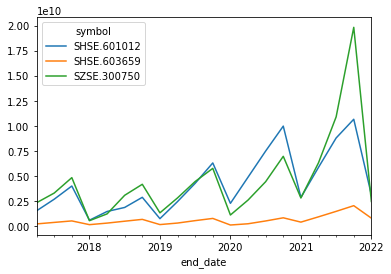

In [64]:
zzz["PERPROFIT"].plot()

<AxesSubplot:xlabel='end_date'>

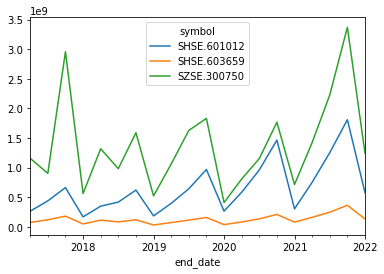

In [65]:
# MANAEXPE	管理费用	元
zzz["MANAEXPE"].plot()

<AxesSubplot:xlabel='end_date'>

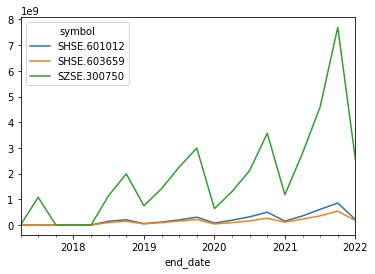

In [67]:
#DEVEEXPE	研发费用	元
zzz["DEVEEXPE"].plot()

In [72]:
#zzz["FINEXPE"]

<AxesSubplot:xlabel='end_date'>

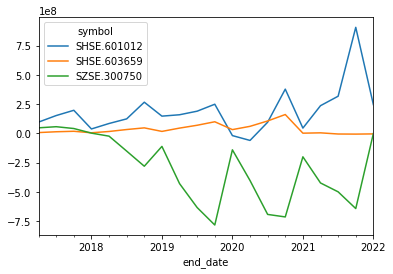

In [68]:
#FINEXPE	财务费用	元
zzz["FINEXPE"].plot()

<AxesSubplot:xlabel='end_date'>

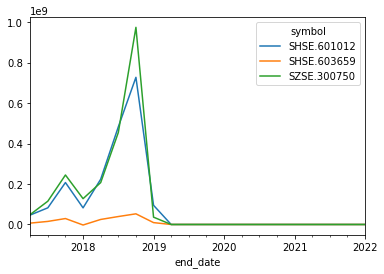

In [70]:
#ASSEIMPALOSS	资产减值损失	元
zzz["ASSEIMPALOSS"].plot()

## 债务表

ACCOPAYA	应付账款	元
ACCORECE	应收账款	元
AVAISELLASSE	可供出售金融资产	元
BDSPAYA	应付债券	元
TOTALCURRLIAB	流动负债合计	元
TOTALNONCASSETS	非流动资产合计	元
TOTALNONCLIAB	非流动负债合计	元
TOTASSET	资产总计	元
TOTCURRASSET	流动资产合计	元
TOTLIAB	负债合计	元
UNDIPROF	未分配利润	元

34	SHSE.601012	14.18	隆基股份	2012-04-11 00:00:00+08:00	68.9000	71.4000	68.8700	73.0000	2022-05-11 00:00:00+08:00
5	SZSE.300750	13.44	宁德时代	2018-06-11 00:00:00+08:00	379.9700	409.7500	379.5000	418.7800	2022-05-11 00:00:00+08:00
0	SHSE.603659	1.99	璞泰来	2017-11-03 00:00:00+08:00	125.8700	131.7300	123.9000	135.8100	2022-05-11 00:00:00+08:00

In [75]:
cw_g_z=get_fundamentals_n(table='balance_sheet', symbols=["SHSE.601012","SZSE.300750","SHSE.603659"], end_date="2022-05-01", count=20,
                            fields='ACCOPAYA,ACCORECE,AVAISELLASSE,BDSPAYA,TOTALCURRLIAB,TOTALNONCASSETS,TOTALNONCLIAB,TOTASSET,TOTCURRASSET,TOTLIAB,UNDIPROF',df=True)

In [79]:
zzz=cw_g_z.set_index(["end_date","symbol"]).unstack()

<AxesSubplot:xlabel='end_date'>

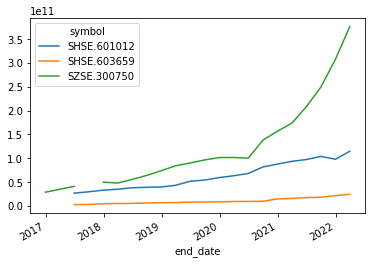

In [80]:
zzz["TOTASSET"].plot()

<AxesSubplot:xlabel='end_date'>

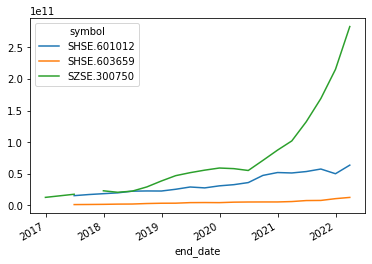

In [81]:
zzz["TOTLIAB"].plot()

<AxesSubplot:xlabel='end_date'>

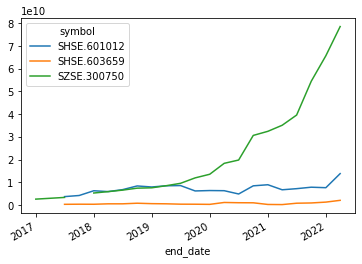

In [82]:
zzz["TOTALNONCLIAB"].plot()

<AxesSubplot:xlabel='end_date'>

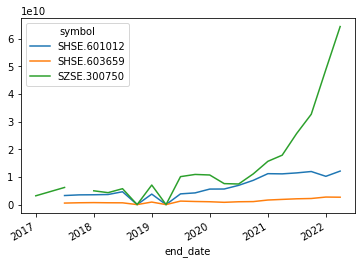

In [83]:
zzz["ACCOPAYA"].plot()

<AxesSubplot:xlabel='end_date'>

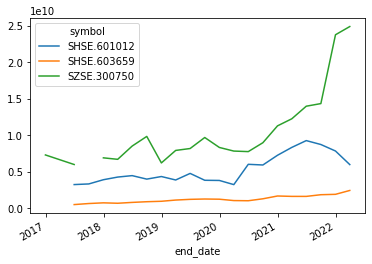

In [84]:
zzz["ACCORECE"].plot()

<AxesSubplot:xlabel='end_date'>

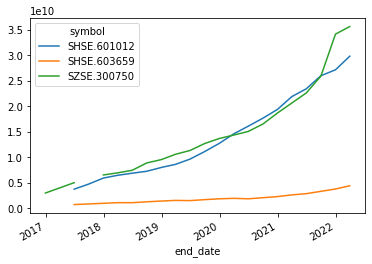

In [85]:
#UNDIPROF
zzz["UNDIPROF"].plot()